# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Autoencoders: Ejemplo MNIST</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span> 

* [Introducción](#Introducción)
* [Autocodificador o autoencoder](#Autocodificador-o-autoencoder)
* [Importa módulos](#Importa-módulos)
* [Parámetros de la red](#Parámetros-de-la-red)
* [Codificador](#Codificador)
* [Decodificador](#Decodificador)
* [Auto-codificador](#Auto-codificador)
* [Entrenamiento](#Compila)
* [Recuperación de imágenes](#Recuperación-de-imágenes)
* [Representación latente](#Representación-latente)

## <span style="color:blue">Introducción</span>

En este cuaderno se implementa un Autoencoder  para el conjunto de datos MINIST. La implementación se base en el uso de capas densas. 

Se muestran un implementación con el Modelo API funcional de tf.keras

## <span style="color:blue">Autocodificador o autoencoder</span>



<figure>
<center>
<img src="../Imagenes/estructura_auto_Encoder.png" width="500" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Estructura de un Autoencoder </p>
</figcaption>
</figure>

Imagen tomada de [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder#/media/File:Autoencoder_structure.png)


Un autoencoder es un tipo de red neuronal artificial utilizada para aprender codificaciones de datos eficientes en sin supervisión manera.

El objetivo de un codificador automático es aprender una representación (codificación) de un conjunto de datos, normalmente para la reducción de dimensionalidad.

Junto con el lado de reducción, se aprende un lado de reconstrucción, donde el decodificador automático intenta generar a partir de la codificación reducida una representación lo más cercana posible a su entrada original, de ahí su nombre.


Adaptado de [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder).

## <span style="color:blue">Importa módulos</span>



In [ ]:
from __future__ import absolute_import, division, print_function
#
import tensorflow as tf
#
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
# 
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:blue">Parámetros de la red Codificadora</span>


In [ ]:
input_shape = (28*28,) # 784
intermediate_dim_1 = 128
intermediate_dim_2 = 64
intermediate_dim_3 = 32
intermediate_dim_4 = 16
latent_dim = 2 
    
# Train parameters
epochs = 3
batch_size=64


## <span style="color:blue">Codificador: encoder</span>


Model: "dense_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
activation_11 (Activation)   (None, 784)               0         
_________________________________________________________________
hidden_layer_1_e (Dense)     (None, 128)               100480    
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_________________________________________________________________
hidden_layer_2_e (Dense)     (None, 64)                8256      
_________________________________________________________________
activation_13 (Activation)   (None, 64)                0         
_________________________________________________________________
hidden_layer_3_e (Dense)     (None, 32)              

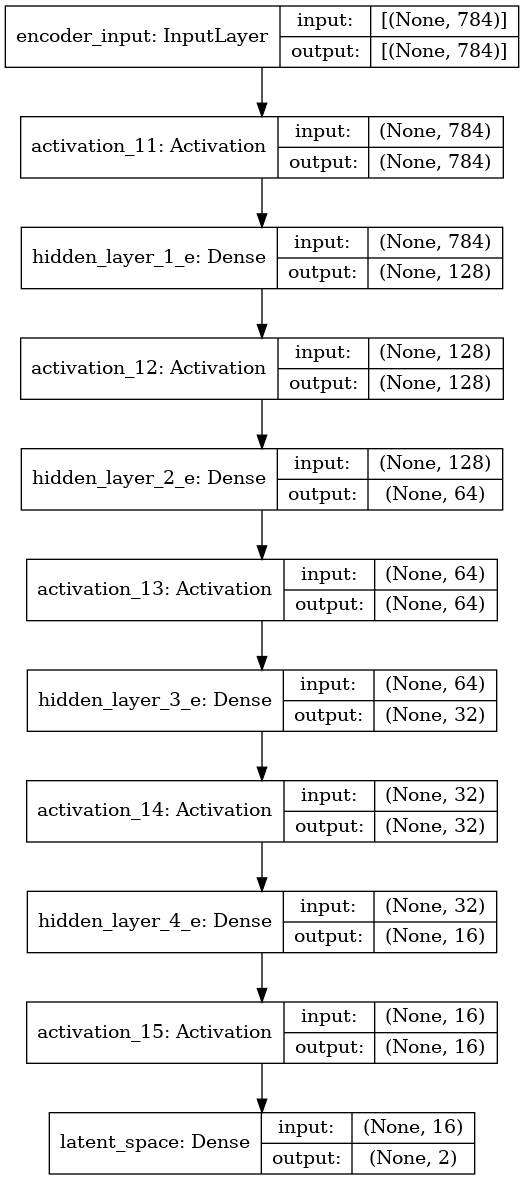

In [25]:
# Define encoder model
inputs = Input(shape=input_shape,name='encoder_input')
x = Activation('relu')(inputs)
x = Dense(intermediate_dim_1, name='hidden_layer_1_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name='hidden_layer_2_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name='hidden_layer_3_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_4, name='hidden_layer_4_e')(x)
x = Activation('relu')(x)
outputs = Dense(latent_dim, name='latent_space')(x)
#outputs = LayerNormalization(axis=1)(x)

encoder = Model(inputs=inputs, outputs=outputs, name='dense_encoder')

encoder.summary()
plot_model(encoder, to_file='../Imagenes/encoder_dense_minist.png', 
           show_shapes=True)

## <span style="color:blue">Decodificador: decoder</span>


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
hidden_layer_de_4_d (Dense)  (None, 16)                48        
_________________________________________________________________
activation_17 (Activation)   (None, 16)                0         
_________________________________________________________________
hidden_layer_de_3_d (Dense)  (None, 32)                544       
_________________________________________________________________
activation_18 (Activation)   (None, 32)                0         
_________________________________________________________________
hidden_layer_de_2_d (Dense)  (None, 64)                2112      
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0   

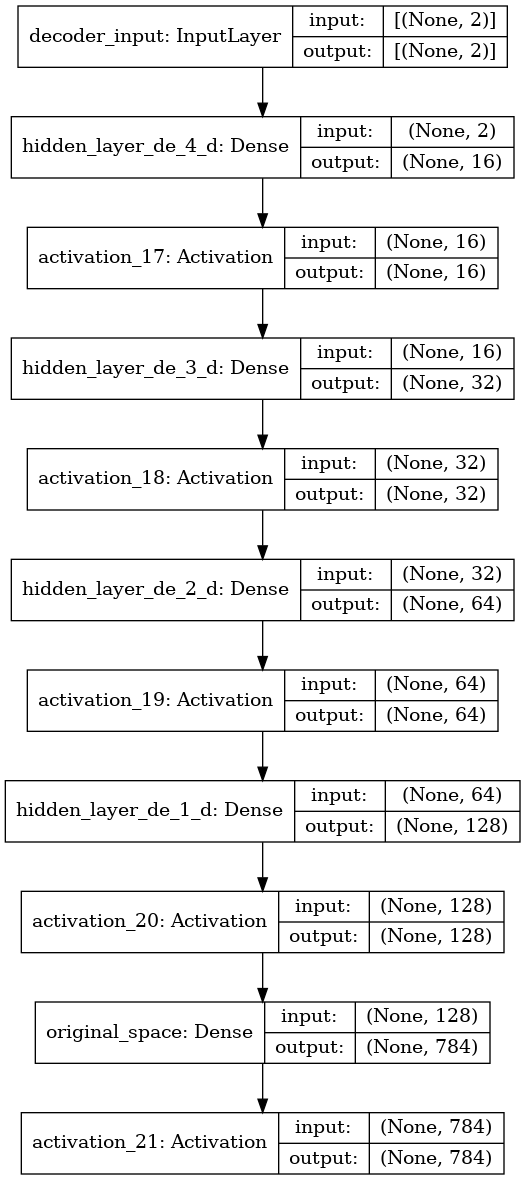

In [26]:
# Define decoder model
latent_input = Input(shape = (latent_dim,), name='decoder_input')
x = Activation('relu')(latent_input)
x = Dense(intermediate_dim_4 , name='hidden_layer_de_4_d')(latent_input)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3 , name='hidden_layer_de_3_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2 , name='hidden_layer_de_2_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1 , name='hidden_layer_de_1_d')(x)
x = Activation('relu')(x)
x = Dense(input_shape[0], name='original_space')(x)
x = Activation('sigmoid')(x)

decoder = Model (inputs=latent_input, outputs=x, name='decoder')

decoder.summary()
plot_model(decoder, to_file='../Imagenes/decoder_dense_minist.png', 
           show_shapes=True)

## <span style="color:blue">Auto-codificador: auto-encoder</span>


Model: "autoencoder_mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
dense_encoder (Functional)   (None, 2)                 111378    
_________________________________________________________________
decoder (Functional)         (None, 784)               112160    
Total params: 223,538
Trainable params: 223,538
Non-trainable params: 0
_________________________________________________________________


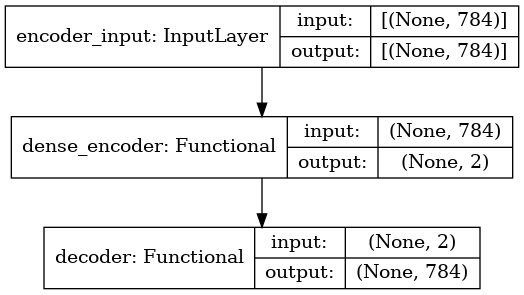

In [27]:
# Autoencoder Model
autoencoder = Model(inputs=inputs, 
                    outputs=decoder(encoder(inputs)),
                    name='autoencoder_mnist_model')

#Summary
autoencoder.summary()
plot_model(autoencoder,
           to_file='../Imagenes/autoencoder_dense_mnist.png',
           show_shapes=True)

## <span style="color:blue">Entrenamiento</span>

### Compila

In [29]:
optimizer = Adam(learning_rate=1e-3)
loss_fn = MeanSquaredError()
autoencoder.compile(optimizer= optimizer, loss = loss_fn)

### Carga los datos


In [30]:
# Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

epochs = 20
batch_size = 64

### Epochs

In [31]:
# Train
history = autoencoder.fit(x_train, x_train, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 17s 17ms/step - loss: 0.0796 - val_loss: 0.0506
Epoch 2/20
844/844 [==============================] - 14s 17ms/step - loss: 0.0492 - val_loss: 0.0446
Epoch 3/20
844/844 [==============================] - 16s 18ms/step - loss: 0.0443 - val_loss: 0.0420
Epoch 4/20
844/844 [==============================] - 14s 16ms/step - loss: 0.0424 - val_loss: 0.0407
Epoch 5/20
844/844 [==============================] - 15s 17ms/step - loss: 0.0414 - val_loss: 0.0399
Epoch 6/20
844/844 [==============================] - 14s 17ms/step - loss: 0.0405 - val_loss: 0.0400
Epoch 7/20
844/844 [==============================] - 15s 18ms/step - loss: 0.0400 - val_loss: 0.0388
Epoch 8/20
844/844 [==============================] - 15s 18ms/step - loss: 0.0393 - val_loss: 0.0389
Epoch 9/20
844/844 [==============================] - 14s 16ms/step - loss: 0.0393 - val_loss: 0.0384
Epoch 10/20
844/844 [==============================] - 14s 17ms/step - loss: 0.038

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist.tail()

,loss,val_loss,epoch
15,0.037208,0.037355,15
16,0.037206,0.036475,16
17,0.037133,0.036866,17
18,0.036752,0.036265,18
19,0.036869,0.036388,19


### Pérdida

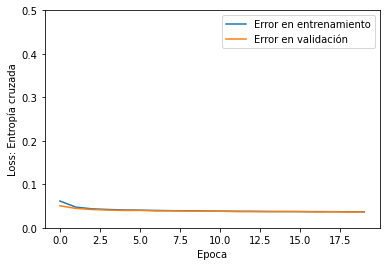

In [33]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error en validación')
plt.ylim([0,0.5])
plt.legend()
plt.show()

## <span style="color:blue">Evaluación externa</span>


In [34]:
# External evaluation
autoencoder.evaluate(x_test,x_test) # 0.0361
autoencoder.evaluate(x_train,x_train) # 0.0358

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0368


0.03680362179875374

## <span style="color:blue">Recuperación de imágenes</span>


In [ ]:
def reconstruction_image(img_original, img_decoded, image_size=28, num_images=8, random=True, file_name=None):
    
    # control number of images, maximum is  16. 
    if num_images > 16:
        num_images = 16
    
    # select images
    if random:
        shape_0 = img_original.shape[0]
        index = np.random.randint(low=0, high=shape_0, size=num_images)
    else:
        index = range(num_images) # first images
    
    # prepare data
    imgs = np.concatenate([img_original[index], img_decoded[index]])
    imgs = imgs.reshape((2, num_images, image_size, image_size))
    imgs = np.vstack([np.hstack(i) for i in imgs])
    
    # plot
    plt.axis('off')
    plt.title('Entrada: Primera Fila, Decodificado: Segunda fila')
    plt.imshow(1-imgs, interpolation='none', cmap='gray')
    if file_name is not None:
        plt.savefig(file_name)
    plt.show()
   

In [ ]:
file_name = '../Imagenes/input_and_decoded.png'
reconstruction_image(img_original= x_test, img_decoded=autoencoder.predict(x_test), 
                         image_size=28, num_images= 20, random=True,
                         file_name=file_name)

## <span style="color:blue">Representación latente</span>

In [ ]:
def plot2D(x_latent, y_label,
           sample_percent = 100, #show 100% by default
           xmin=-4.0, ymin=-4.0,
           xmax=4.0,  ymax=4.0,
           filename=None,
           xlabel='Dim 1',
           ylabel='Dim 2',
           title='Latent Space-2D'):
    
    
    # select sample to reduce the data
    if sample_percent>=100:
        sample_percent= 100
    elif sample_percent<=0:
        sample_percent= 10
    if sample_percent!=100:
        shape_0 = x_latent.shape[0]
        size = int(shape_0*sample_percent/100)
        index = index = np.random.randint(low=0, high=shape_0, size=size)
        z = x_latent[index]
        y_test = y_label[index]
    else:
        z = x_latent
        y_test = y_label
    
    
    # configure the plot
    #fig, ax = plt.subplots(figsize=(20, 16))
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel(xlabel,fontsize=12)
    ax.set_ylabel(ylabel,fontsize=12)
    ax.set_title(title,fontsize=15)
    ax.grid(True)
    
    # plot
    #plt.scatter(z[:, 0], z[:, 1], marker="")
    ax.scatter(z[:, 0], z[:, 1], c=y_label ,alpha=0.1, edgecolors='none')
    for i, digit in enumerate(y_test):
        ax.annotate(digit, (z[i, 0], z[i, 1]))
   
    # save the plot
    if filename is not None:
        plt.savefig(filename)
    #plt.show()
    
   

In [ ]:
# extract encoding data to future use
x_train_latent = encoder(x_train)
x_train_latent = x_train_latent.numpy()

x_test_latent = encoder(x_test)
x_test_latent = x_test_latent.numpy()

In [ ]:
filename='../Imagenes/latent_2D_space_minist.png'
plot2D(x_test_latent[0::2], y_test[0::2], filename=filename)# Comienza en el índice 0 toma cada dos posiciones

### Imagen Generada por la función plot2D

![](../Imagenes/latent_2D_space_minist.png)